# An analysis and Visualization of Migration Casualties across in the world from 2016 t0 2022.

In order to ensure an error-free data analysis, the data was cleaned by replacing null values of the continous variables by their different mean values while those of categorical variables were dropped. 

This project sought to answer the following questions:
1. The sum of the following variables:
a. Number of Dead
b. Minimum Estimated Number of Missing
c. Total Number of Dead and Missing	
d. Number of Survivors
e. Number of Females	
f. Number of Males	Number of Children

2. Count of Incident Type
3. Count of Migration Route- Top 10
4. Count of Location of Deaths - Top 10
5. Count of Cause of Deaths - Top 10
6. Sum of Dead by Region- Top 10
7. Sum of Minimum Estimated Number of Missing by Region- Top 10
8. Sum of Dead by Incident Type 
9. Sum of Dead by Cause of Death
10. Sum of Total Number of Dead and Missing by Coordinates- Top 10
11. Worthy of note is that 1821 Western Africans suffered casualty by Death or Missing
And lots more of insights generated and shown by using the bar graphs.


Note: I sincerely apologise that I did not comment by code perhaps because they are short, simple and self explanatory. Most aided by the attached graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [64]:
df  = pd.read_excel('Missing_Migrants_Global_Figures.xlsx')

df.head(3)

,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN


In [10]:
df.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident Date', 'Incident year', 'Reported Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Region of Origin', 'Cause of Death', 'Migration route',
       'Location of death', 'Information Source', 'Coordinates',
       'UNSD Geographical Grouping', 'Article title', 'Source Quality', 'URL'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=10274, step=1)

In [5]:
df.isna().sum()

Main ID                                   0
Incident ID                               0
Incident Type                             0
Region of Incident                        0
Incident Date                            15
Incident year                             0
Reported Month                            0
Number of Dead                          430
Minimum Estimated Number of Missing    9299
Total Number of Dead and Missing          0
Number of Survivors                    8763
Number of Females                      8344
Number of Males                        4037
Number of Children                     8997
Region of Origin                          0
Cause of Death                            0
Migration route                        2240
Location of death                         0
Information Source                       12
Coordinates                              57
UNSD Geographical Grouping                1
Article title                          6339
Source Quality                  

In [13]:
duplicateRows = df[df.duplicated(['Region of Incident', 'Incident Type'])]

In [20]:
df['Incident Type'].value_counts()

Incident                   10020
Split Incident               171
Cumulative Incident           82
Incident,Split Incident        1
Name: Incident Type, dtype: int64

In [24]:
df['Location of death'].value_counts()

Pima Country Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)    1061
Reported at Milak border crossing, Iran                                                                         200
Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)      198
Agadez, Niger                                                                                                   120
Sahara desert, Libya                                                                                            116
                                                                                                               ... 
Pintor Ranch near Falfurrias, Brooks County, Texas / USBP Rio Grande Valley Sector                                1
Train tracks near Oltrisarco, Bolzano, South Tyrol, Italy                                                         1
900m off the coast of Morro Jable, Fuerteventura, Canary Islands, Spain 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10274 entries, 0 to 10273
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              10274 non-null  object 
 1   Incident ID                          10274 non-null  object 
 2   Incident Type                        10274 non-null  object 
 3   Region of Incident                   10274 non-null  object 
 4   Incident Date                        10259 non-null  object 
 5   Incident year                        10274 non-null  int64  
 6   Reported Month                       10274 non-null  object 
 7   Number of Dead                       9844 non-null   float64
 8   Minimum Estimated Number of Missing  975 non-null    float64
 9   Total Number of Dead and Missing     10274 non-null  int64  
 10  Number of Survivors                  1511 non-null   float64
 11  Number of Females           

In [7]:
df['Number of Dead'].mean()

2.646688338073954

In [27]:
df['Number of Dead'].fillna(df['Number of Dead'].mean(), inplace = True)
df['Minimum Estimated Number of Missing'].fillna(df['Minimum Estimated Number of Missing'].mean(), inplace = True)
df['Number of Survivors'].fillna(df['Number of Survivors'].mean(), inplace = True)
df['Number of Females'].fillna(df['Number of Females'].mean(), inplace = True)
df['Number of Children'].fillna(df['Number of Children'].mean(), inplace = True)
df['Source Quality'].fillna(df['Source Quality'].mean(), inplace = True)
df['Number of Males'].fillna(df['Number of Males'].mean(), inplace = True)

In [25]:
df.drop(columns = ['URL', 'Article title', 'Main ID'], axis = 1, inplace = True)

In [29]:
df.dropna(inplace = True)

In [30]:
df.isna().sum()

Incident ID                            0
Incident Type                          0
Region of Incident                     0
Incident Date                          0
Incident year                          0
Reported Month                         0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Region of Origin                       0
Cause of Death                         0
Migration route                        0
Location of death                      0
Information Source                     0
Coordinates                            0
UNSD Geographical Grouping             0
Source Quality                         0
dtype: int64

In [33]:
df1 = df[:]

In [34]:
df1.head(3)

,Incident ID,Incident Type,Region of Incident,Incident Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Source Quality
0,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,21.852308,1,45.342819,2.607254,1.000000,2.007048,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,5.0
1,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,21.852308,1,45.342819,2.607254,1.770563,2.007048,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,5.0
2,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,21.852308,1,45.342819,2.607254,1.770563,2.007048,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,5.0


In [43]:
df1.corr().drop(columns = 'Incident year')

,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
Incident year,-0.090150,-0.068135,-0.097044,-0.084633,-0.004643,-0.012534,-0.043001,0.181646
Number of Dead,1.000000,0.188086,0.656469,0.043822,0.060853,0.135023,0.096548,-0.005037
Minimum Estimated Number of Missing,0.188086,1.000000,0.805757,0.088401,0.050984,0.153656,0.203670,0.024657
Total Number of Dead and Missing,0.656469,0.805757,1.000000,0.076427,0.108159,0.237356,0.230515,0.028720
Number of Survivors,0.043822,0.088401,0.076427,1.000000,-0.000529,0.018210,0.003961,-0.007365
Number of Females,0.060853,0.050984,0.108159,-0.000529,1.000000,0.170037,0.150622,0.059434
Number of Males,0.135023,0.153656,0.237356,0.018210,0.170037,1.000000,0.089277,0.018910
Number of Children,0.096548,0.203670,0.230515,0.003961,0.150622,0.089277,1.000000,0.039835
Source Quality,-0.005037,0.024657,0.028720,-0.007365,0.059434,0.018910,0.039835,1.000000


<AxesSubplot:>

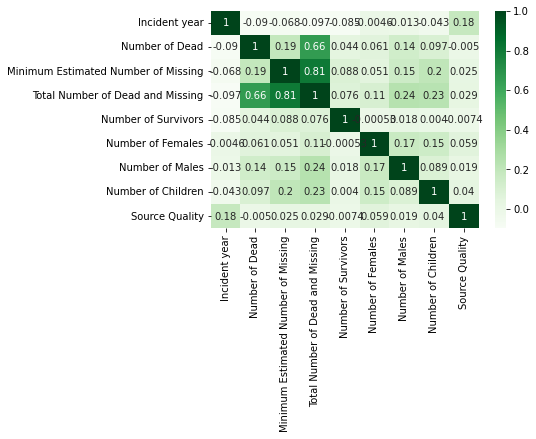

In [44]:
sns.heatmap(df1.corr(), annot = True, cmap = 'Greens')

In [38]:
df1.describe().drop(columns ='Incident year')

,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000
mean,2.624035,21.857728,4.880176,46.193942,2.655748,1.805839,1.997474,3.363593
std,10.592149,15.541236,21.779063,45.452030,2.922933,4.093549,0.898703,1.379344
min,0.000000,-2.000000,1.000000,-2.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,21.852308,1.000000,45.342819,2.607254,1.000000,2.007048,2.000000
50%,1.000000,21.852308,1.000000,45.342819,2.607254,1.000000,2.007048,4.000000
75%,2.000000,21.852308,2.000000,45.342819,2.607254,1.770563,2.007048,5.000000
max,750.000000,550.000000,1022.000000,1950.000000,90.000000,135.000000,40.000000,5.000000


In [66]:
df1['Incident ID'].count()

7970

<AxesSubplot:title={'center':'Plot of Sum of all Indicators'}, xlabel='Sum of all Indicators', ylabel='Indicators'>

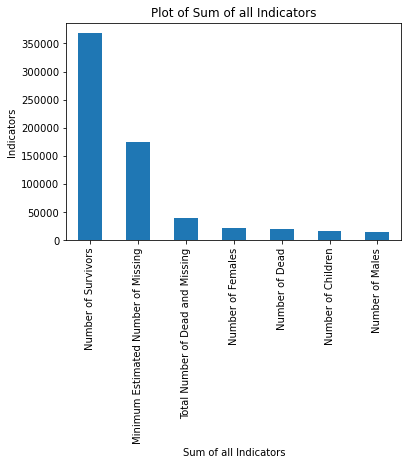

In [161]:
df1[['Number of Dead','Minimum Estimated Number of Missing',
     'Total Number of Dead and Missing','Number of Survivors',
     'Number of Females','Number of Males','Number of Children']].sum().round(0).sort_values(ascending = False).plot(kind = 'bar', xlabel = 'Sum of all Indicators', ylabel = 'Indicators', title = 'Plot of Sum of all Indicators')

array([<AxesSubplot:ylabel='Indicators'>], dtype=object)

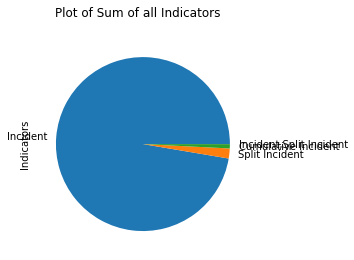

In [162]:
df1['Incident Type'].value_counts().plot(kind = 'pie',subplots = True, xlabel = 'Sum of all Indicators', ylabel = 'Indicators', title = 'Plot of Sum of all Indicators')

<AxesSubplot:title={'center':'Plot of Count of Incidents'}, xlabel='Incident Type', ylabel='Count of Incident Type'>

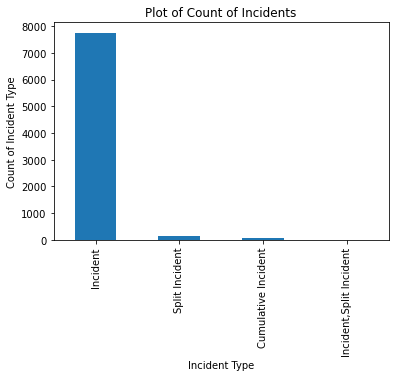

In [166]:
df1['Incident Type'].value_counts().plot(kind = 'bar', xlabel = 'Incident Type', ylabel = 'Count of Incident Type', title = 'Plot of Count of Incidents')

<AxesSubplot:title={'center':'Plot of Count of Incidents'}, xlabel='Region of Incidents', ylabel='Count of Incidents'>

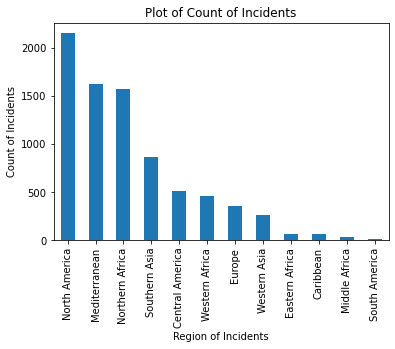

In [167]:
df1['Region of Incident'].value_counts().plot(kind = 'bar', xlabel = 'Region of Incidents', ylabel = 'Count of Incidents', title = 'Plot of Count of Incidents')

<AxesSubplot:title={'center':'Plot of Top "10" Migration Route'}, xlabel='Migration Route', ylabel='Count of Migration Route'>

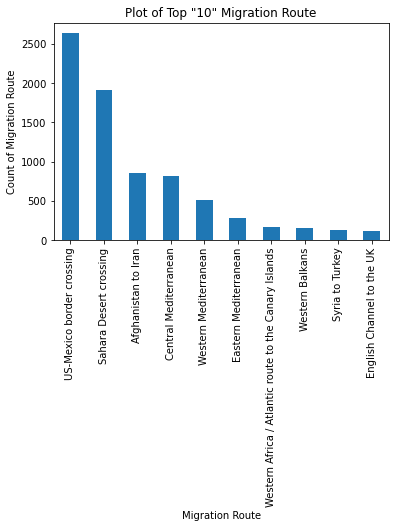

In [171]:
df1['Migration route'].value_counts()[:10].plot(kind = 'bar', xlabel = 'Migration Route', ylabel = 'Count of Migration Route', title = 'Plot of Top "10" Migration Route')

<AxesSubplot:title={'center':'Plot of Top "10" Deaths by Location'}, xlabel='Location of Death', ylabel='Count of Deaths by Location'>

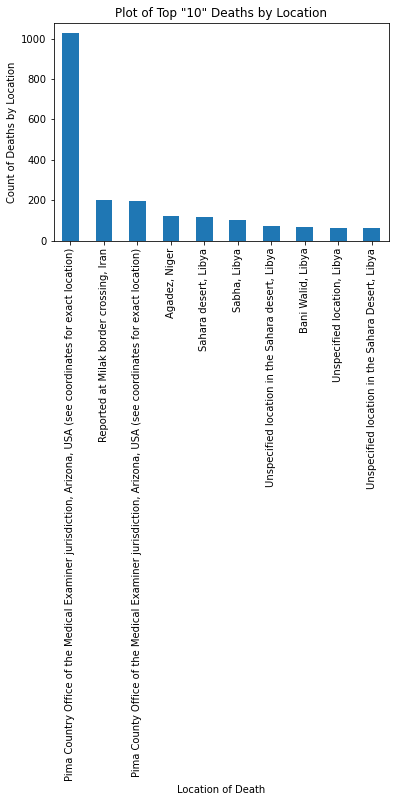

In [172]:
df1['Location of death'].value_counts()[:10].plot(kind = 'bar', xlabel = 'Location of Death', ylabel = 'Count of Deaths by Location', title = 'Plot of Top "10" Deaths by Location')

<AxesSubplot:title={'center':'Plot of Coordinates where most Deaths Occured by Top 10'}, xlabel='Coordinates', ylabel='Count of Coordinates'>

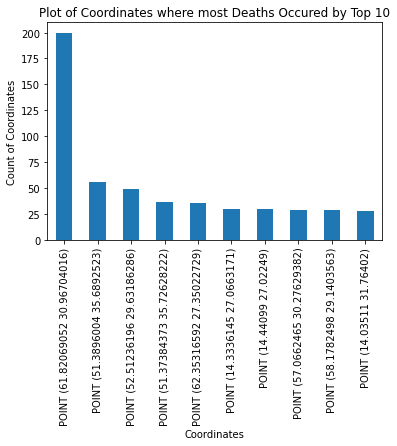

In [179]:
df1['Coordinates'].value_counts()[:10].plot(kind = 'bar', xlabel = 'Coordinates', ylabel = 'Count of Coordinates', title = 'Plot of Coordinates where most Deaths Occured by Top 10')

<AxesSubplot:title={'center':'Plot of Top "10" Cause of Deaths'}, xlabel='Cause of Deaths', ylabel='Count of Cause of Deaths'>

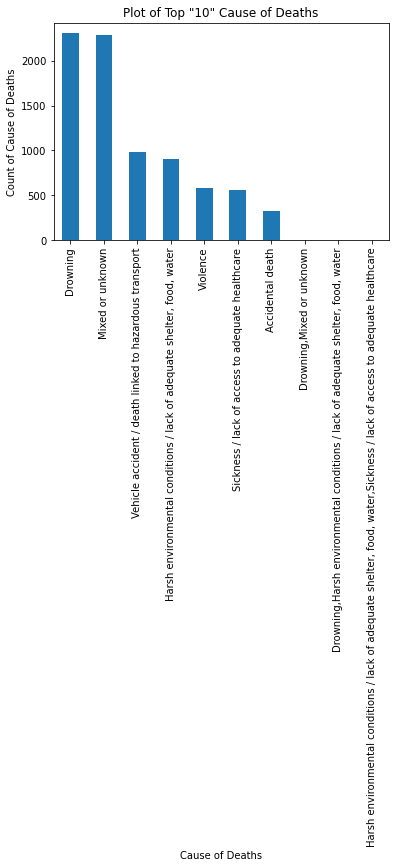

In [180]:
df1['Cause of Death'].value_counts()[:10].plot(kind = 'bar', xlabel = 'Cause of Deaths', ylabel = 'Count of Cause of Deaths', title = 'Plot of Top "10" Cause of Deaths')

<AxesSubplot:title={'center':'Plot of Top "10" Region of Origin'}, xlabel='Region of Origin', ylabel='Count of Region of Origin'>

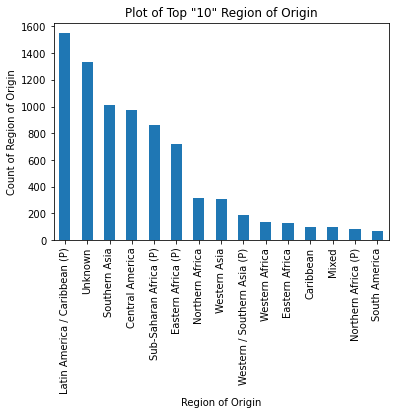

In [182]:
df1['Region of Origin'].value_counts()[:15].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Count of Region of Origin', title = 'Plot of Top "15" Region of Origin')

In [84]:
df1.head(3)

,Incident ID,Incident Type,Region of Incident,Incident Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Source Quality
0,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,21.852308,1,45.342819,2.607254,1.000000,2.007048,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,5.0
1,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,21.852308,1,45.342819,2.607254,1.770563,2.007048,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,5.0
2,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,21.852308,1,45.342819,2.607254,1.770563,2.007048,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,5.0


<AxesSubplot:title={'center':'Plot of Number of Dead by Region of Origin'}, xlabel='Region of Incident', ylabel='Number of Dead'>

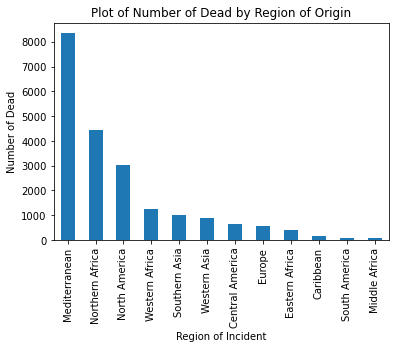

In [184]:
df1.groupby(['Region of Incident']).sum()['Number of Dead'].sort_values(ascending = False).round(0).plot(kind = 'bar', xlabel = 'Region of Incident', ylabel = 'Number of Dead', title = 'Plot of Number of Dead by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Dead by Region of Origin'}, xlabel='Region of Origin', ylabel='Number of Dead'>

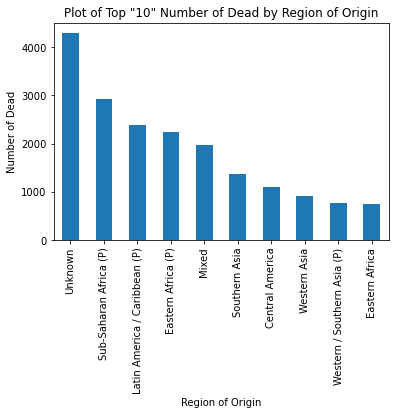

In [185]:
df1.groupby(['Region of Origin']).sum()['Number of Dead'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Number of Dead', title = 'Plot of Top "10" Number of Dead by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Minimum Estimated Number of Missing by Region of Origin'}, xlabel='Region of Origin', ylabel='Minimum Estimated Number of Missing'>

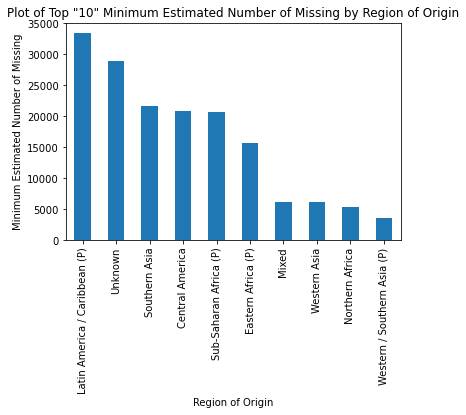

In [186]:
df1.groupby(['Region of Origin']).sum()['Minimum Estimated Number of Missing'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Minimum Estimated Number of Missing', title = 'Plot of Top "10" Minimum Estimated Number of Missing by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Total Number of Dead and Missing by Region of Origin'}, xlabel='Region of Origin', ylabel='Total Number of Dead and Missing'>

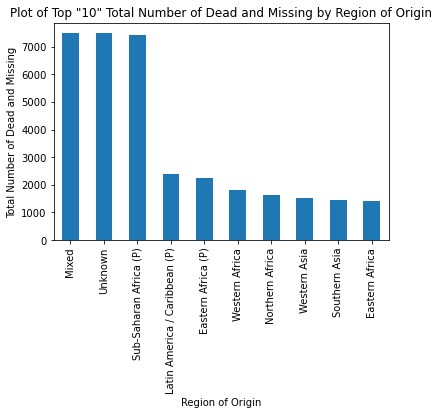

In [187]:
df1.groupby(['Region of Origin']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Top "10" Total Number of Dead and Missing by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Survivors by Region of Origin'}, xlabel='Region of Origin', ylabel='Number of Survivors'>

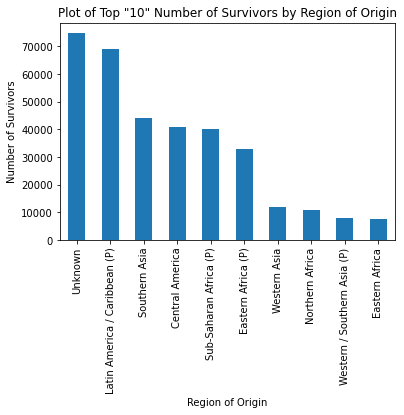

In [199]:
df1.groupby(['Region of Origin']).sum()['Number of Survivors'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Number of Survivors', title = 'Plot of Top "10" Number of Survivors by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Children by Region of Origin'}, xlabel='Region of Origin', ylabel='Number of Children'>

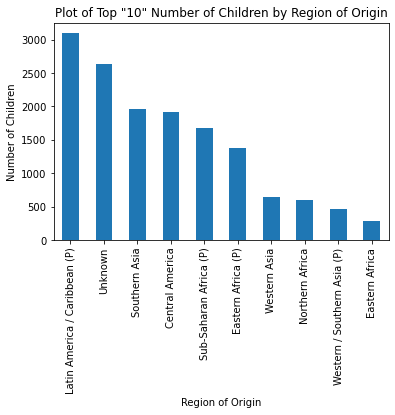

In [200]:
df1.groupby(['Region of Origin']).sum()['Number of Children'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Number of Children', title = 'Plot of Top "10" Number of Children by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Females by Region of Origin'}, xlabel='Region of Origin', ylabel='Number of Females'>

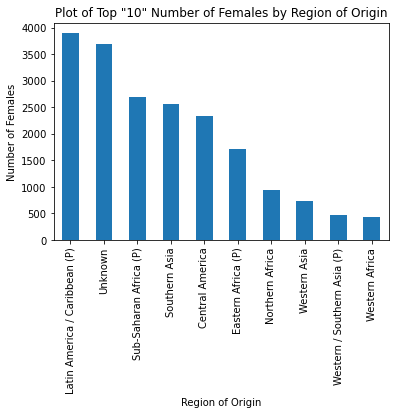

In [188]:
df1.groupby(['Region of Origin']).sum()['Number of Females'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Number of Females', title = 'Plot of Top "10" Number of Females by Region of Origin')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Males by Region of Origin'}, xlabel='Region of Origin', ylabel='Number of Males'>

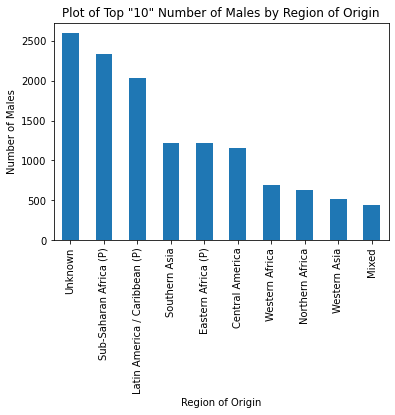

In [189]:
df1.groupby(['Region of Origin']).sum()['Number of Males'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Region of Origin', ylabel = 'Number of Males', title = 'Plot of Top "10" Number of Males by Region of Origin')

In [201]:
df1['Incident Type'].value_counts()

Incident                   7758
Split Incident              148
Cumulative Incident          63
Incident,Split Incident       1
Name: Incident Type, dtype: int64

In [202]:
df1.groupby(['Incident Type']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False)

Incident Type
Incident                   33749
Split Incident              3998
Cumulative Incident         1089
Incident,Split Incident       59
Name: Total Number of Dead and Missing, dtype: int64

In [203]:
df1.groupby(['Incident Type']).sum()['Number of Survivors'].sort_values(ascending = False)

Incident Type
Incident                   355936.318994
Split Incident               9356.798147
Cumulative Incident          2856.597617
Incident,Split Incident        16.000000
Name: Number of Survivors, dtype: float64

<AxesSubplot:title={'center':'Plot of Top "10" Total Number of Dead and Missing by Migration Route'}, xlabel='Migration Route', ylabel='Total Number of Dead and Missing'>

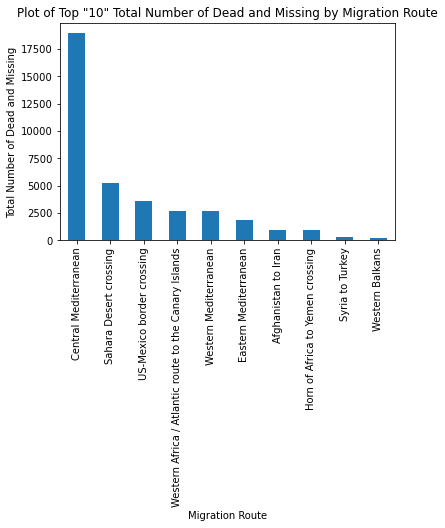

In [190]:
df1.groupby(['Migration route']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Migration Route', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Top "10" Total Number of Dead and Missing by Migration Route')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Survivors by Migration Route'}, xlabel='Migration Route', ylabel='Number of Survivors'>

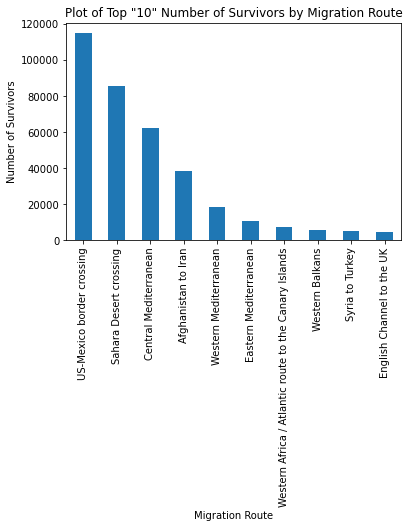

In [191]:
df1.groupby(['Migration route']).sum()['Number of Survivors'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Migration Route', ylabel = 'Number of Survivors', title = 'Plot of Top "10" Number of Survivors by Migration Route')

<AxesSubplot:title={'center':'Plot of Top "10" Number of Dead by Cause of Death'}, xlabel='Cause of Death', ylabel='Number of Dead'>

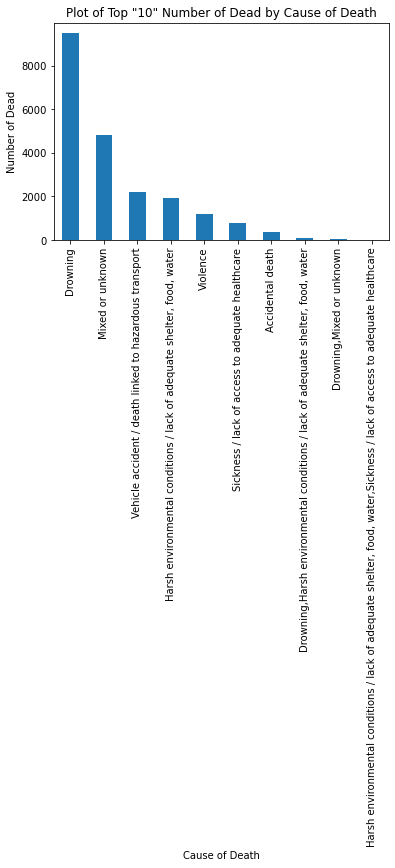

In [192]:
df1.groupby(['Cause of Death']).sum()['Number of Dead'].sort_values(ascending = False).round(0)[:10].plot(kind = 'bar', xlabel = 'Cause of Death', ylabel = 'Number of Dead', title = 'Plot of Top "10" Number of Dead by Cause of Death')

<AxesSubplot:title={'center':'Plot of Top "10" Total Number of Dead and Missingby Incident Year'}, xlabel='Incident Year', ylabel='Total Number of Dead and Missing'>

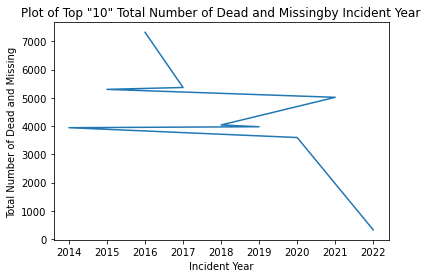

In [193]:
df1.groupby(['Incident year']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0).plot(kind = 'line', xlabel = 'Incident Year', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Top "10" Total Number of Dead and Missingby Incident Year')

<AxesSubplot:title={'center':'Plot of Top "10" Total Number of Dead and Missingby Incident Year'}, xlabel='Incident Year', ylabel='Total Number of Dead and Missing'>

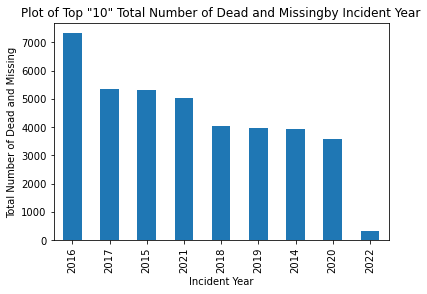

In [195]:
df1.groupby(['Incident year']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0).plot(kind = 'bar', xlabel = 'Incident Year', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Top "10" Total Number of Dead and Missingby Incident Year')

<AxesSubplot:title={'center':'Plot of Total Number of Dead and Missingby Incident Reported Month'}, xlabel='Reported Month', ylabel='Total Number of Dead and Missing'>

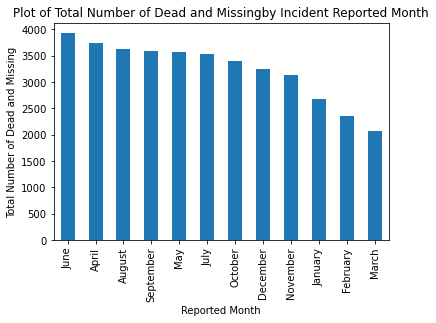

In [197]:
df1.groupby(['Reported Month']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0).plot(kind = 'bar', xlabel = 'Reported Month', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Total Number of Dead and Missingby Incident Reported Month')

<AxesSubplot:title={'center':'Plot of Total Number of Dead and Missingby Incident Reported Month'}, xlabel='Reported Month', ylabel='Total Number of Dead and Missing'>

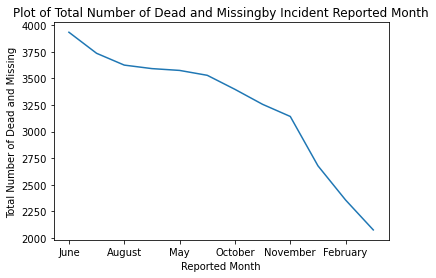

In [198]:
df1.groupby(['Reported Month']).sum()['Total Number of Dead and Missing'].sort_values(ascending = False).round(0).plot(kind = 'line', xlabel = 'Reported Month', ylabel = 'Total Number of Dead and Missing', title = 'Plot of Total Number of Dead and Missingby Incident Reported Month')

In [205]:
df1.head(1)

,Incident ID,Incident Type,Region of Incident,Incident Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Source Quality
0,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,21.852308,1,45.342819,2.607254,1.0,2.007048,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,5.0


In [208]:
df[['Region of Origin', 'Total Number of Dead and Missing']].sort_values(by = 'Total Number of Dead and Missing', ascending  = False)

,Region of Origin,Total Number of Dead and Missing
401,Mixed,1022
253,South-eastern Asia,750
1597,Mixed,550
199,Mixed,500
1476,Mixed,459
...,...,...
4364,Latin America / Caribbean (P),1
4360,Unknown,1
4359,Latin America / Caribbean (P),1
4358,Unknown,1


In [214]:
df1[df1['Region of Origin'] == 'Western Africa'].sum()['Total Number of Dead and Missing']

1821

In [113]:
df1[df1['Region of Origin'].str.contains('Africa')].sum()['Total Number of Dead and Missing']

15532

In [215]:
df1[df1['Region of Origin'].str.contains('Western Africa')].sum()['Total Number of Dead and Missing']

1917

In [119]:
df1.pivot_table(index = 'Region of Origin', columns = 'Incident year', values ='Total Number of Dead and Missing', aggfunc = 'mean')

Incident year,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region of Origin,,,,,,,,,
Caribbean,1.000000,3.000000,4.000000,6.300000,2.857143,3.375000,5.176471,4.733333,1.200000
Caribbean (P),NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
Central America,1.000000,1.195652,1.075630,1.122642,1.094595,1.144654,1.179310,1.210762,1.000000
Central America (P),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Eastern Africa,20.703704,3.235294,5.941176,8.875000,11.000000,12.222222,8.416667,10.687500,2.333333
Eastern Africa (P),1.000000,4.790476,3.456592,3.268293,1.761905,1.659574,2.000000,12.666667,NaN
Eastern Asia,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
Europe,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Latin America / Caribbean (P),2.610526,1.882353,1.662722,1.460000,1.238938,1.522613,1.025830,1.748918,2.000000


In [121]:
Pivot_sum_of_Dead_Aand_Misiing_by_Year = df1.pivot_table(index = 'Region of Origin', columns = 'Incident year', values ='Total Number of Dead and Missing', aggfunc = 'sum')

In [130]:
Pivot_sum_of_Dead_Aand_Misiing_by_Year.fillna('-')

Incident year,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region of Origin,,,,,,,,,
Caribbean,1.0,21.0,60.0,63.0,20.0,27.0,88.0,142.0,6.0
Caribbean (P),-,-,-,-,-,-,-,12.0,-
Central America,20.0,55.0,128.0,119.0,162.0,182.0,171.0,270.0,5.0
Central America (P),-,-,-,-,-,-,-,1.0,-
Eastern Africa,559.0,55.0,101.0,142.0,154.0,110.0,101.0,171.0,7.0
Eastern Africa (P),1.0,503.0,1075.0,268.0,296.0,78.0,4.0,38.0,-
Eastern Asia,-,-,-,-,-,4.0,-,-,-
Europe,1.0,-,-,-,-,1.0,-,-,-
Latin America / Caribbean (P),248.0,288.0,281.0,292.0,280.0,303.0,278.0,404.0,14.0


In [135]:
dfRegOrigNumDead = df1.groupby(['Region of Origin']).sum()['Number of Dead'].sort_values(ascending = False).round(0)[:10]

<AxesSubplot:xlabel='Region of Origin'>

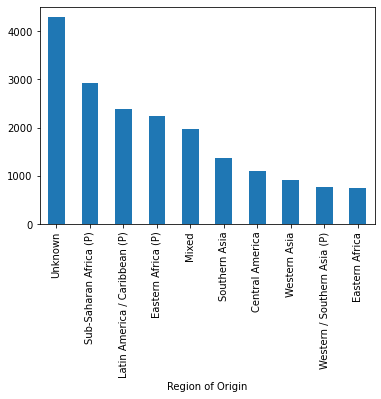

In [141]:
dfRegOrigNumDead.plot(kind = 'bar')

In [155]:
df1.corr()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
Incident year,1.000000,-0.090150,-0.068135,-0.097044,-0.084633,-0.004643,-0.012534,-0.043001,0.181646
Number of Dead,-0.090150,1.000000,0.188086,0.656469,0.043822,0.060853,0.135023,0.096548,-0.005037
Minimum Estimated Number of Missing,-0.068135,0.188086,1.000000,0.805757,0.088401,0.050984,0.153656,0.203670,0.024657
Total Number of Dead and Missing,-0.097044,0.656469,0.805757,1.000000,0.076427,0.108159,0.237356,0.230515,0.028720
Number of Survivors,-0.084633,0.043822,0.088401,0.076427,1.000000,-0.000529,0.018210,0.003961,-0.007365
Number of Females,-0.004643,0.060853,0.050984,0.108159,-0.000529,1.000000,0.170037,0.150622,0.059434
Number of Males,-0.012534,0.135023,0.153656,0.237356,0.018210,0.170037,1.000000,0.089277,0.018910
Number of Children,-0.043001,0.096548,0.203670,0.230515,0.003961,0.150622,0.089277,1.000000,0.039835
Source Quality,0.181646,-0.005037,0.024657,0.028720,-0.007365,0.059434,0.018910,0.039835,1.000000


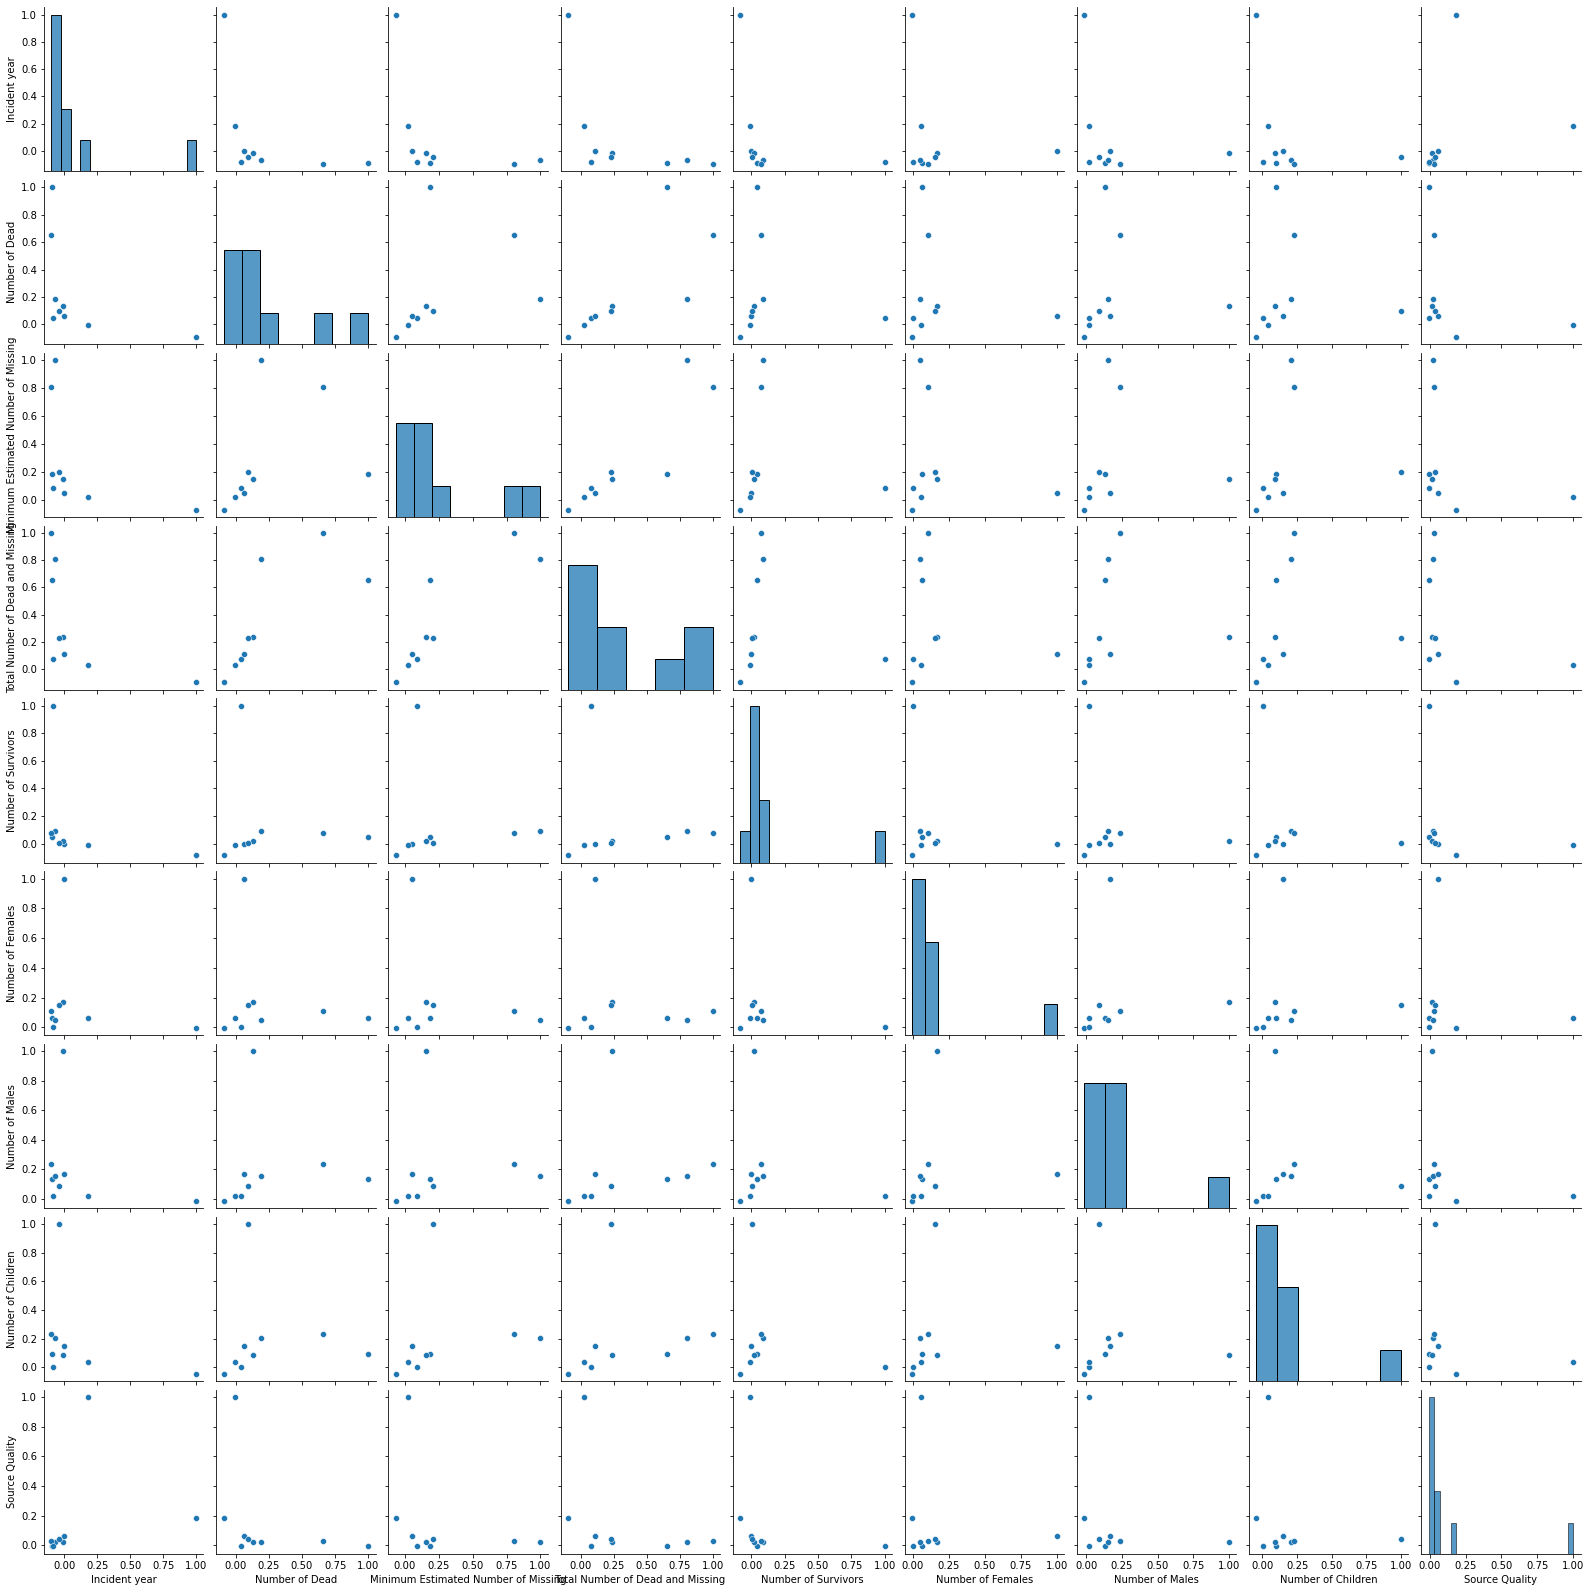

In [156]:
sns.pairplot(df1.corr())